In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

# Regressão

* Base com indicadores sociais e econômicos de municípios brasileiros

In [2]:
df = pd.read_csv('municipios.csv')

In [3]:
pd.set_option('display.max_columns', None)
df.head()

,id_municipio,ano,expectativa_vida,fecundidade_total,mortalidade_1,mortalidade_5,razao_dependencia,prob_sobrevivencia_40,prob_sobrevivencia_60,taxa_envelhecimento,expectativa_anos_estudo,taxa_analfabetismo_11_a_14,taxa_analfabetismo_15_a_17,taxa_analfabetismo_15_mais,taxa_analfabetismo_18_a_24,taxa_analfabetismo_18_mais,taxa_analfabetismo_25_a_29,taxa_analfabetismo_25_mais,taxa_atraso_0_basico,taxa_atraso_0_fundamental,taxa_atraso_0_medio,taxa_atraso_1_basico,taxa_atraso_1_fundamental,taxa_atraso_1_medio,taxa_atraso_2_basico,taxa_atraso_2_fundamental,taxa_atraso_2_medio,taxa_freq_bruta_basico,taxa_freq_bruta_fundamental,taxa_freq_bruta_medio,taxa_freq_bruta_pre,taxa_freq_bruta_superior,taxa_freq_liquida_basico,taxa_freq_liquida_fundamental,taxa_freq_liquida_medio,taxa_freq_liquida_pre,taxa_freq_liquida_superior,taxa_freq_0_3,taxa_freq_11_14,taxa_freq_15_17,taxa_freq_18_24,taxa_freq_25_29,taxa_freq_4_5,taxa_freq_4_6,taxa_freq_5_6,taxa_freq_6,taxa_freq_6_14,taxa_freq_6_17,taxa_freq_fundamental_15_17,taxa_freq_fundamental_18_24,taxa_freq_fundamental_4_5,taxa_freq_medio_18_24,taxa_freq_medio_6_14,taxa_freq_superior_15_17,taxa_fundamental_11_13,taxa_fundamental_12_14,taxa_fundamental_15_17,taxa_fundamental_16_18,taxa_fundamental_18_24,taxa_fundamental_18_mais,taxa_fundamental_25_mais,taxa_medio_18_20,taxa_medio_18_24,taxa_medio_18_mais,taxa_medio_19_21,taxa_medio_25_mais,taxa_superior_25_mais,renda_pc_max_quintil_1,renda_pc_max_quintil_2,renda_pc_max_quintil_3,renda_pc_max_quintil_4,renda_pc_max_decil_9,indice_gini,prop_pobreza_extrema,prop_pobreza_extrema_criancas,prop_pobreza,prop_pobreza_criancas,prop_vulner_pobreza,prop_vulner_pobreza_criancas,prop_renda_10_ricos,prop_renda_20_pobres,prop_renda_20_ricos,prop_renda_40_pobres,prop_renda_60_pobres,prop_renda_80_pobres,prop_renda_trabalho,razao_10_ricos_40_pobres,razao_20_ricos_40_pobres,renda_pc,renda_pc_quintil_1,renda_pc_decil_10,renda_pc_quintil_2,renda_pc_quintil_3,renda_pc_quintil_4,renda_pc_quintil_5,renda_pc_exc_renda_nula,renda_pc_pobreza_extrema,renda_pc_pobreza,renda_pc_vulner_pobreza,indice_theil,prop_trabalhadores_conta_proria,prop_empregadores,prop_ocupados_agropecuaria,prop_ocupados_comercio,prop_ocupados_construcao,prop_ocupados_extracao,prop_ocupados_formalizacao,prop_ocupados_fundamental,prop_ocupados_medio,prop_ocupados_servicos,prop_ocupados_siup,prop_ocupados_superior,prop_ocupados_transformacao,prop_ocupados_renda_0,prop_ocupados_renda_1_sm,prop_ocupados_renda_2_sm,prop_ocupados_renda_3_sm,prop_ocupados_renda_5_sm,renda_media_ocupados,taxa_atividade,taxa_atividade_10_14,taxa_atividade_15_17,taxa_atividade_18_24,taxa_atividade_18_mais,taxa_atividade_25_29,taxa_desocupacao,taxa_desocupacao_10_14,taxa_desocupacao_15_17,taxa_desocupacao_18_24,taxa_desocupacao_18_mais,taxa_desocupacao_25_29,indice_treil_trabalho,taxa_ocupados_carteira,taxa_ocupados_setor_publico,taxa_ocupados_sem_carteira,taxa_agua_encanada,taxa_banheiro_agua_encanada,taxa_densidade_2_mais,taxa_coleta_lixo,taxa_energia_eletrica,taxa_agua_esgoto_inadequados,taxa_paredes_inadequados,taxa_criancas_dom_sem_fund,taxa_criancas_fora_escola_4_5,taxa_criancas_fora_escola_6_14,taxa_dom_sem_fund,taxa_dom_vulner_sem_fund,taxa_sem_fund_informal,taxa_mulheres_com_filho_10_14,taxa_mulheres_com_filho_15_17,taxa_mulheres_chefe_filho_15m,taxa_nest_ntrab_vulner_15_24,taxa_vulner_desloc_1_hora,taxa_dom_vulner_dep_idoso,taxa_sem_energia_eletrica,populacao_homens_0_4,populacao_homens_10_14,populacao_homens_15_19,populacao_homens_20_24,populacao_homens_25_29,populacao_homens_30_34,populacao_homens_35_39,populacao_homens_40_44,populacao_homens_45_49,populacao_homens_50_54,populacao_homens_55_59,populacao_homens_5_9,populacao_homens_60_64,populacao_homens_65_69,populacao_homens_70_74,populacao_homens_75_79,populacao_homens,populacao_homens_80_mais,populacao_mulheres_0_4,populacao_mulheres_10_14,populacao_mulheres_15_19,populacao_mulheres_20_24,populacao_mulheres_25_29,populacao_mulheres_30_34,populacao_mulheres_35_39,popul

In [4]:
#Selecao de alguns indicadores do ano de 2010
df = df[['ano','mortalidade_5','taxa_analfabetismo_25_mais','taxa_freq_liquida_basico',
         'prop_vulner_pobreza','populacao_65_mais']]
df = df.loc[df['ano'] == 2010]
len(df)

5565

In [5]:
df.head()

,ano,mortalidade_5,taxa_analfabetismo_25_mais,taxa_freq_liquida_basico,prop_vulner_pobreza,populacao_65_mais
2,2010,25.49,15.76,85.25,47.12,1425
5,2010,20.53,10.48,85.46,29.04,3943
8,2010,26.58,16.78,88.82,46.98,434
11,2010,15.38,10.95,88.24,29.82,4378
14,2010,19.42,13.51,84.69,34.85,1097


* Boxplot da variável dependente
    * Há outliers positivos na variável

<AxesSubplot:xlabel='mortalidade_5'>

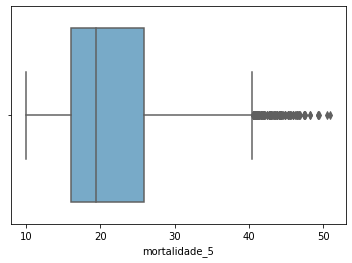

In [6]:
sns.boxplot(x=df["mortalidade_5"], palette="Blues")

* Correlação de spearman entre as variáveis 
    * Observa-se que a mortalidade possui correlação alta com taxa de analfabetismo e proporcao vulneravel a pobreza

In [7]:
df[['mortalidade_5','taxa_analfabetismo_25_mais','taxa_freq_liquida_basico',
         'prop_vulner_pobreza','populacao_65_mais']].corr('spearman')

,mortalidade_5,taxa_analfabetismo_25_mais,taxa_freq_liquida_basico,prop_vulner_pobreza,populacao_65_mais
mortalidade_5,1.000000,0.841041,0.081405,0.846082,-0.067284
taxa_analfabetismo_25_mais,0.841041,1.000000,0.065045,0.892018,-0.130941
taxa_freq_liquida_basico,0.081405,0.065045,1.000000,0.062614,-0.141769
prop_vulner_pobreza,0.846082,0.892018,0.062614,1.000000,-0.067766
populacao_65_mais,-0.067284,-0.130941,-0.141769,-0.067766,1.000000


* Separacao entre variaveis dependentes e independentes

In [8]:
X = df[['taxa_analfabetismo_25_mais','taxa_freq_liquida_basico',
         'prop_vulner_pobreza','populacao_65_mais']]
Y = df[['mortalidade_5']]

* Segmentando os dados em porções de treino e teste

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.30, random_state=0)

* Escalagem das variáveis
    * Como KNN utiliza o conceito de distancia, é necessario colocar as variaveis em mesma escala
    * Utilizando robust scaler para a escalagem
        * Metodo de escalar a variável de forma robusta a outliers
        * Utiliza a mediana e intervalo interquartil para o calculo

In [10]:
from sklearn.preprocessing import RobustScaler

In [11]:
colunas = [
    'taxa_analfabetismo_25_mais','taxa_freq_liquida_basico',
         'prop_vulner_pobreza','populacao_65_mais'
]

In [12]:
escaladas = {}
X_train_escal = X_train.copy()
X_test_escal = X_test.copy()
for col in colunas:
    scaler = RobustScaler()
    scaler.fit(X_train_escal[[col]])
    X_train_escal.loc[:,col] = scaler.transform(X_train_escal[[col]])
    X_test_escal.loc[:,col] = scaler.transform(X_test_escal[[col]])
    escaladas[col] = scaler

In [13]:
X_train_escal.head()

,taxa_analfabetismo_25_mais,taxa_freq_liquida_basico,prop_vulner_pobreza,populacao_65_mais
11654,-0.132802,1.389011,-0.724276,-0.441749
11432,-0.605819,-0.145055,-0.706096,36.277839
11210,-0.402628,0.731868,-0.203369,-0.058067
6731,-0.258564,-0.004396,-0.362380,-0.164645
10958,-0.482403,0.617582,-0.705854,1.667769


* Hiperparametro a ser ajustado é o número de vizinhos (De 1 até 300)
    *  As métricas de avaliação do modelo a serem calculadas nas iterações são: R2 e erro quadrado médio
        * R2: % da variância da variável dependente que é explicada pelas variáveis independentes (modelo)
        * Erro quadrado médio: Diferença do valor real em relação ao predito, ao quadrado

In [14]:
parametro = {'n_neighbors':np.arange(1, 300,1)}
scoring = {'R2': 'r2', 'Erro Quadrado médio': 'neg_mean_squared_error'}

* Ajustando o algoritmo do KNN
    * Por padrão, utilizará a distância euclidiana
    * O parâmetro weights = 'distance' atribui peso maior para observações mais próximas

In [15]:
knn = KNeighborsRegressor(weights = 'distance',algorithm = 'kd_tree')

In [16]:
#Iterando (cross-validation) para obter o melhor hiperparâmetro com base na métrica do erro quadrado médio
KNN = GridSearchCV(knn, parametro, scoring= scoring, refit = 'Erro Quadrado médio', cv=10)

In [17]:
KNN.fit(X_train_escal,y_train)

GridSearchCV(cv=10, error_score=nan,
             estimator=KNeighborsRegressor(algorithm='kd_tree', leaf_size=30,
                                           metric='minkowski',
                                           metric_params=None, n_jobs=None,
                                           n_neighbors=5, p=2,
                                           weights='distance'),
             iid='deprecated', n_jobs=None,
             param_grid={'n_neighbors': array([  1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,
        14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,
        27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,...
       248, 249, 250, 251, 252, 253, 254, 255, 256, 257, 258, 259, 260,
       261, 262, 263, 264, 265, 266, 267, 268, 269, 270, 271, 272, 273,
       274, 275, 276, 277, 278, 279, 280, 281, 282, 283, 284, 285, 286,
       287, 288, 289, 290, 291, 292, 293, 294, 295, 296, 297, 298, 299])},
             pre_dispatch='2*n_jobs

In [18]:
# O número de vizinhos que produz o menor erro quadrado médio (15,95) é de 51
print(KNN.best_estimator_.n_neighbors)
print(KNN.best_score_)

51
-15.955251599683866


* Informacoes das iterações com as métricas em cada split 

In [19]:
resultados = KNN.cv_results_
resultados = pd.DataFrame.from_dict(resultados)

In [20]:
pd.set_option('display.max_columns', None)
resultados

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_neighbors,params,split0_test_R2,split1_test_R2,split2_test_R2,split3_test_R2,split4_test_R2,split5_test_R2,split6_test_R2,split7_test_R2,split8_test_R2,split9_test_R2,mean_test_R2,std_test_R2,rank_test_R2,split0_test_Erro Quadrado médio,split1_test_Erro Quadrado médio,split2_test_Erro Quadrado médio,split3_test_Erro Quadrado médio,split4_test_Erro Quadrado médio,split5_test_Erro Quadrado médio,split6_test_Erro Quadrado médio,split7_test_Erro Quadrado médio,split8_test_Erro Quadrado médio,split9_test_Erro Quadrado médio,mean_test_Erro Quadrado médio,std_test_Erro Quadrado médio,rank_test_Erro Quadrado médio
0,0.005456,0.000798,0.004491,0.000675,1,{'n_neighbors': 1},0.445269,0.358711,0.408404,0.507417,0.451632,0.429856,0.443303,0.463607,0.493088,0.279797,0.428108,0.063289,299,-30.717438,-30.938888,-30.935942,-30.959743,-31.836358,-29.157372,-29.160586,-27.343316,-26.744397,-36.118157,-30.391220,2.480694,299
1,0.005280,0.001673,0.004893,0.001638,2,{'n_neighbors': 2},0.575135,0.535248,0.496535,0.591868,0.596813,0.598206,0.586864,0.611209,0.594409,0.523681,0.570997,0.036521,298,-23.526292,-22.421872,-26.327351,-25.651854,-23.407641,-20.547905,-21.640665,-19.819131,-21.398745,-23.887363,-22.862882,2.000572,298
2,0.005583,0.001487,0.006085,0.001702,3,{'n_neighbors': 3},0.586292,0.579408,0.557186,0.608195,0.638160,0.640311,0.658162,0.641127,0.663170,0.593898,0.616591,0.034558,297,-22.908520,-20.291371,-23.155791,-24.625681,-21.007187,-18.394627,-17.905981,-18.294009,-17.770968,-20.365994,-20.472013,2.316503,297
3,0.004742,0.001067,0.005386,0.001200,4,{'n_neighbors': 4},0.607600,0.624571,0.581212,0.645470,0.648846,0.660133,0.671000,0.666478,0.681002,0.630514,0.641682,0.029432,296,-21.728603,-18.112506,-21.899393,-22.282908,-20.386816,-17.380924,-17.233520,-17.001717,-16.830157,-18.529706,-19.138625,2.093140,296
4,0.005178,0.000612,0.004666,0.000451,5,{'n_neighbors': 5},0.633257,0.633352,0.606472,0.654064,0.665594,0.676310,0.691933,0.682701,0.696952,0.639656,0.658029,0.028105,295,-20.307900,-17.688852,-20.578515,-21.742714,-19.414440,-16.553640,-16.137000,-16.174732,-15.988629,-18.071228,-18.265765,2.007964,295
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
294,0.004892,0.000837,0.029217,0.002010,295,{'n_neighbors': 295},0.653723,0.693876,0.649830,0.659972,0.701957,0.704600,0.718835,0.708898,0.706054,0.680764,0.687851,0.023849,284,-19.174586,-14.768908,-18.311204,-21.371431,-17.303376,-15.106836,-14.727817,-14.839282,-15.508406,-16.009672,-16.712152,2.154528,284
295,0.004691,0.000451,0.029920,0.003568,296,{'n_neighbors': 296},0.653674,0.693997,0.649540,0.659850,0.701651,0.704705,0.718815,0.708753,0.705872,0.680751,0.687761,0.023881,285,-19.177316,-14.763032,-18.326408,-21.379077,-17.321096,-15.101482,-14.728856,-14.846665,-15.518046,-16.010320,-16.717230,2.157751,285
296,0.005190,0.001247,0.029982,0.002976,297,{'n_neighbors': 297},0.653789,0.693751,0.649589,0.659640,0.701624,0.704631,0.718614,0.708809,0.705921,0.680768,0.687713,0.023850,286,-19.170939,-14.774945,-18.323836,-21.392256,-17.322708,-15.105295,-14.739383,-14.843847,-15.515459,-16.009466,-16.719814,2.157816,286
297,0.005192,0.000598,0.029232,0.001434,298,{'n_neighbors': 298},0.653761,0.693710,0.649485,0.659444,0.701403,0.704642,0.718576,0.708759,0.705648,0.680770,0.687620,0.023851,287,-19.172514,-14.776885,-18.329283,-21.404573,-17.335538,-15.104694,-14.741375,-14.846368,-15.529819,-16.009359,-16.725041,2.160101,287


* Grafico de como variam as métricas de avaliação do modelo conforme a quantidade de vizinhos do modelo

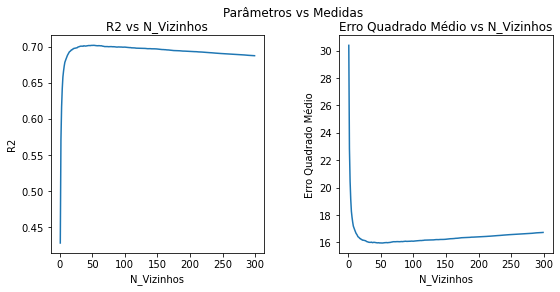

In [21]:
fig, axs = plt.subplots(1,2, figsize=(9,4))
axs[0].plot(resultados['param_n_neighbors'], resultados['mean_test_R2'])
axs[0].set(xlabel='N_Vizinhos', ylabel='R2',
       title='R2 vs N_Vizinhos')
axs[1].plot(resultados['param_n_neighbors'], abs(resultados['mean_test_Erro Quadrado médio']))
axs[1].set(xlabel='N_Vizinhos', ylabel='Erro Quadrado Médio',
       title='Erro Quadrado Médio vs N_Vizinhos')
fig.suptitle('Parâmetros vs Medidas') 
plt.subplots_adjust(wspace=0.35,hspace=1)

In [22]:
#Calcular a performance do modelo nos dados de teste
previsoes = KNN.predict(X_test_escal)
erro = mean_squared_error(y_test, previsoes)
print("Erro Quadrado Médio:", erro)
r2 = r2_score(y_test, previsoes)
print("R2:", r2)

Erro Quadrado Médio: 15.708339666611293
R2: 0.7074091063670136


* Calcular os erros

In [23]:
erros = pd.DataFrame(columns=['real','previsto'])

In [24]:
previsao = []
for x in previsoes:
    for y in x:
        previsao.append(y)

In [25]:
for x,y in zip(previsao,y_test['mortalidade_5']):
    erros = erros.append({'real': x, 'previsto': y}, ignore_index=True)

In [26]:
erros['erro'] = erros['real'] - erros['previsto']

In [27]:
erros

,real,previsto,erro
0,14.713625,14.15,0.563625
1,33.344124,42.00,-8.655876
2,31.005018,27.74,3.265018
3,17.788467,16.17,1.618467
4,17.030659,14.57,2.460659
...,...,...,...
1665,32.095336,28.01,4.085336
1666,29.017728,41.27,-12.252272
1667,17.209780,18.29,-1.080220
1668,29.579969,22.23,7.349969


* Os erros estão concentrados em até 5
* Porém, há um viés nos erros, de superestimar a variável resposta, visivel pelos altos erros de negativos
    * Possivelmente influenciado pelos outliers positivos da variavel resposta

<AxesSubplot:>

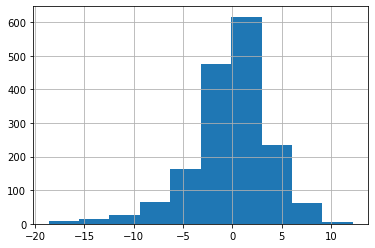

In [28]:
erros['erro'].hist()

<AxesSubplot:xlabel='erro'>

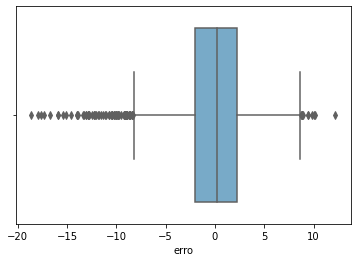

In [29]:
sns.boxplot(x=erros["erro"], palette="Blues")

In [30]:
erros['erro'].quantile([.1,.25,.5,.75,0.9])

0.10   -4.627162
0.25   -1.981850
0.50    0.235449
0.75    2.259285
0.90    4.096004
Name: erro, dtype: float64

# Classificação

In [31]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import f1_score

In [32]:
df.head()

,ano,mortalidade_5,taxa_analfabetismo_25_mais,taxa_freq_liquida_basico,prop_vulner_pobreza,populacao_65_mais
2,2010,25.49,15.76,85.25,47.12,1425
5,2010,20.53,10.48,85.46,29.04,3943
8,2010,26.58,16.78,88.82,46.98,434
11,2010,15.38,10.95,88.24,29.82,4378
14,2010,19.42,13.51,84.69,34.85,1097


* Categorizando a variável dependente

In [33]:
df['Maior20'] = np.where(df['mortalidade_5'] > 20, 1, 0)

In [34]:
df['Maior20'].value_counts()

0    2945
1    2620
Name: Maior20, dtype: int64

In [35]:
#Retirando variáveis desnecessárias ao modelo e transformando a var. dependente em categoria
df.drop(columns=['ano','mortalidade_5'],inplace = True)
df.Maior20 = df.Maior20.astype('str')

* PLotando o boxplot das variáveis independentes segmentadas pela variável dependente (categórica)
    * O comportamento das variáveis de taxa de analfabetismo e vulnerabilidade de pobreza é distinta conforme a var. dependente

<AxesSubplot:xlabel='Maior20', ylabel='populacao_65_mais'>

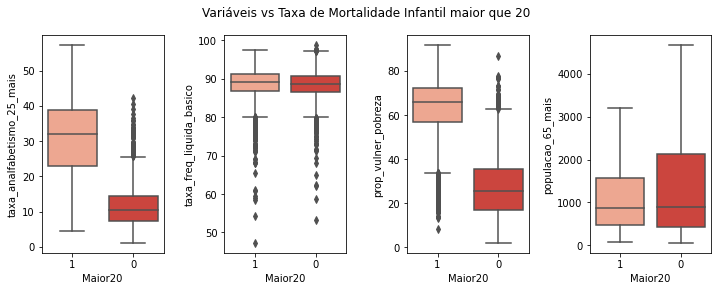

In [36]:
fig, axs = plt.subplots(1,4, figsize=(12,4))
plt.subplots_adjust(wspace=0.5,hspace=5)
fig.suptitle('Variáveis vs Taxa de Mortalidade Infantil maior que 20') 
sns.boxplot(ax = axs[0],x=df["Maior20"], y=df["taxa_analfabetismo_25_mais"], palette="Reds")
sns.boxplot(ax = axs[1],x=df["Maior20"], y=df["taxa_freq_liquida_basico"], palette="Reds")
sns.boxplot(ax = axs[2],x=df["Maior20"], y=df["prop_vulner_pobreza"], palette="Reds")
sns.boxplot(ax = axs[3],x=df["Maior20"], y=df["populacao_65_mais"], palette="Reds", showfliers = False)

* Calculando o R2 entre as variaveis independentes (quantitativas) e a variável dependente (qualitativa)
    * As variáveis de vulnerabilidade a pobreza e taxa analfabetismo tem um bom R2 com a variavel dependente

In [37]:
CATVAR = df.select_dtypes(include=['object']).columns.tolist()
NUMVAR = df.select_dtypes(include=['float64','int64']).columns.tolist()
r2 = pd.DataFrame(columns=['VarQuanti','VarQuali','var*n / n_total','R2'])
for z in NUMVAR:
    for x in CATVAR:
        dfr = df[x].value_counts().reset_index()
        f = 0
        a1 = 0
        for y in range(len(dfr)):
            a = dfr.iloc[y,1]
            a1 = a1 + a
            c = (df[df[x] == dfr.iloc[y,0]])
            e = (c[z].var())*a
            f = f + e
        f = f/a1
        r2_calc = 1 - (f/df[z].var())
        r2 = r2.append({'VarQuanti' : z, 'VarQuali' : x,'var*n / n_total' : f, 'R2' : r2_calc}, ignore_index=True)
r2 = r2.sort_values(by = 'R2', ascending = False)
r2

,VarQuanti,VarQuali,var*n / n_total,R2
2,prop_vulner_pobreza,Maior20,1.923560e+02,0.617934
0,taxa_analfabetismo_25_mais,Maior20,6.988561e+01,0.571177
3,populacao_65_mais,Maior20,2.806437e+08,0.004506
1,taxa_freq_liquida_basico,Maior20,1.634031e+01,0.000003


In [38]:
X = df[['taxa_analfabetismo_25_mais','taxa_freq_liquida_basico',
         'prop_vulner_pobreza','populacao_65_mais']]
Y = df[['Maior20']]

* Dividindo entre treino e teste

In [39]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.30, random_state=0)

* Escalagem das variáveis

In [40]:
colunas = [
    'taxa_analfabetismo_25_mais','taxa_freq_liquida_basico',
         'prop_vulner_pobreza','populacao_65_mais'
]

In [41]:
escaladas = {}
X_train_escal = X_train.copy()
X_test_escal = X_test.copy()
for col in colunas:
    scaler = RobustScaler()
    scaler.fit(X_train_escal[[col]])
    X_train_escal.loc[:,col] = scaler.transform(X_train_escal[[col]])
    X_test_escal.loc[:,col] = scaler.transform(X_test_escal[[col]])
    escaladas[col] = scaler

In [42]:
X_train_escal.head()

,taxa_analfabetismo_25_mais,taxa_freq_liquida_basico,prop_vulner_pobreza,populacao_65_mais
11654,-0.132802,1.389011,-0.724276,-0.441749
11432,-0.605819,-0.145055,-0.706096,36.277839
11210,-0.402628,0.731868,-0.203369,-0.058067
6731,-0.258564,-0.004396,-0.362380,-0.164645
10958,-0.482403,0.617582,-0.705854,1.667769


* Hiperparametro a ser ajustado é o número de vizinhos (De 1 até 300)
    * As métricas de avaliação do modelo a serem calculadas nas iterações são: f1_score e ROC AUC Score
        * F1_score: Média harmônica entre o precision e o recall do modelo:
             * Precision: % das previsões positivas do modelo que realmente são positivas
             * Recall: Dos casos positivos da base, quanto % o modelo acertou que são positivas
        * ROC AUC Score: Área sob a curva ROC, mensura o quão bem o modelo esta identificando os verdadeiros positivos sem elevar os falsos positivos

In [43]:
parametro = {'n_neighbors':np.arange(1, 300,1)}
scoring = {'AUC': 'roc_auc', 'f1': 'f1'}

In [44]:
knn = KNeighborsClassifier(weights = 'distance',algorithm = 'brute')

In [45]:
#Iterando (cross-validation) para obter o melhor hiperparâmetro com base na métrica do ROC AUC Score
KNN = GridSearchCV(knn, parametro, scoring= scoring, refit = 'AUC', cv=10)

In [46]:
y_train.Maior20 = y_train.Maior20.astype('int64')
y_test.Maior20 = y_test.Maior20.astype('int64')

In [47]:
KNN.fit(X_train_escal,y_train)

GridSearchCV(cv=10, error_score=nan,
             estimator=KNeighborsClassifier(algorithm='brute', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=5, p=2,
                                            weights='distance'),
             iid='deprecated', n_jobs=None,
             param_grid={'n_neighbors': array([  1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,
        14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,
        27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  3...
       235, 236, 237, 238, 239, 240, 241, 242, 243, 244, 245, 246, 247,
       248, 249, 250, 251, 252, 253, 254, 255, 256, 257, 258, 259, 260,
       261, 262, 263, 264, 265, 266, 267, 268, 269, 270, 271, 272, 273,
       274, 275, 276, 277, 278, 279, 280, 281, 282, 283, 284, 285, 286,
       287, 288, 289, 290, 291, 

In [48]:
# O número de vizinhos que resulta no maior ROC AUC Score (0,948) é de 103
print(KNN.best_estimator_.n_neighbors)
print(KNN.best_score_)

103
0.9483192455394374


* Informacoes das iterações com as métricas em cada split 

In [49]:
resultados = KNN.cv_results_
resultados = pd.DataFrame.from_dict(resultados)
resultados.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_neighbors,params,split0_test_AUC,split1_test_AUC,split2_test_AUC,split3_test_AUC,split4_test_AUC,split5_test_AUC,split6_test_AUC,split7_test_AUC,split8_test_AUC,split9_test_AUC,mean_test_AUC,std_test_AUC,rank_test_AUC,split0_test_f1,split1_test_f1,split2_test_f1,split3_test_f1,split4_test_f1,split5_test_f1,split6_test_f1,split7_test_f1,split8_test_f1,split9_test_f1,mean_test_f1,std_test_f1,rank_test_f1
0,0.003092,0.000941,0.052274,0.004122,1,{'n_neighbors': 1},0.811682,0.837801,0.812078,0.852654,0.808384,0.839038,0.811652,0.831999,0.830673,0.806217,0.824218,0.015337,299,0.806283,0.828338,0.801090,0.842975,0.801061,0.827778,0.801090,0.821918,0.823529,0.794521,0.814858,0.015234,298
1,0.002892,0.000829,0.056851,0.003829,2,{'n_neighbors': 2},0.887057,0.871926,0.879261,0.901356,0.869776,0.898409,0.887646,0.898091,0.898940,0.874178,0.886664,0.011616,298,0.806283,0.828338,0.801090,0.842975,0.801061,0.827778,0.801090,0.821918,0.823529,0.794521,0.814858,0.015234,298
2,0.002692,0.000457,0.066423,0.004329,3,{'n_neighbors': 3},0.906382,0.892175,0.902702,0.916988,0.899865,0.915589,0.908378,0.909385,0.918796,0.892086,0.906235,0.009090,297,0.842105,0.846154,0.854749,0.867606,0.838889,0.865753,0.845070,0.847458,0.884615,0.836158,0.852856,0.014561,297
3,0.002793,0.000870,0.071510,0.005520,4,{'n_neighbors': 4},0.908321,0.906514,0.909864,0.928266,0.908967,0.928367,0.911903,0.921739,0.923834,0.907794,0.915557,0.008461,296,0.840659,0.850000,0.855524,0.868347,0.846797,0.865014,0.843575,0.853933,0.883978,0.841808,0.854964,0.013123,296
4,0.002944,0.000647,0.071409,0.004443,5,{'n_neighbors': 5},0.917265,0.911038,0.918228,0.940692,0.917001,0.938335,0.921328,0.930355,0.936705,0.908245,0.923919,0.011122,295,0.848315,0.854749,0.857955,0.869318,0.852273,0.866667,0.870056,0.869318,0.872222,0.849711,0.861058,0.008896,295


 * Grafico de como variam as métricas de avaliação do modelo conforme a quantidade de vizinhos do modelo
    * Próximo a 50 vizinhos as métricas se estabilizam, com pequenas oscilações do F1 Score

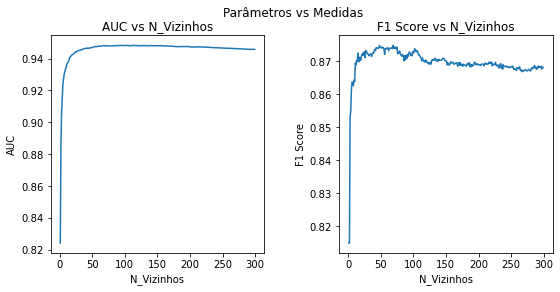

In [50]:
fig, axs = plt.subplots(1,2, figsize=(9,4))
axs[0].plot(resultados['param_n_neighbors'], resultados['mean_test_AUC'])
axs[0].set(xlabel='N_Vizinhos', ylabel='AUC',
       title='AUC vs N_Vizinhos')
axs[1].plot(resultados['param_n_neighbors'], abs(resultados['mean_test_f1']))
axs[1].set(xlabel='N_Vizinhos', ylabel='F1 Score',
       title='F1 Score vs N_Vizinhos')
fig.suptitle('Parâmetros vs Medidas') 
plt.subplots_adjust(wspace=0.35,hspace=1)

In [51]:
# Calculo do f1_score nos dados de teste
f1_score(y_test, KNN.predict(X_test_escal))

0.8694481830417227

In [52]:
# Calculando métricas de avaliação do modelo com base nas probabilidades de cada observação
y_score = KNN.predict_proba(X_test_escal)[:,1]
fpr, tpr, threshold = roc_curve(y_test, y_score)

In [53]:
# Calculo do ROC AUC Score nos dados de teste
print('ROC_AUC_SCORE: ', roc_auc_score(y_test, y_score))

ROC_AUC_SCORE:  0.9479184673004897


* Desenho da curva ROC

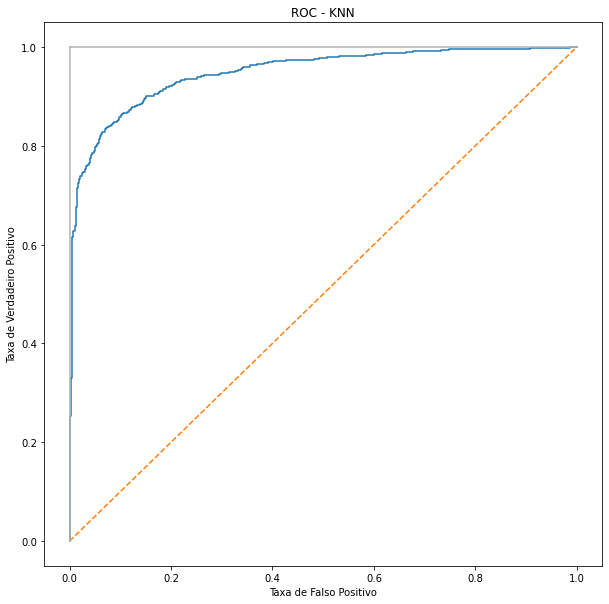

In [54]:
plt.subplots(1, figsize=(10,10))
plt.title('ROC - KNN')
plt.plot(fpr, tpr)
plt.plot([0, 1], ls="--")
plt.plot([0, 0], [1, 0] , c=".7"), plt.plot([1, 1] , c=".7")
plt.ylabel('Taxa de Verdadeiro Positivo')
plt.xlabel('Taxa de Falso Positivo')
plt.show()

* Taxa de verdadeiros positivos e falsos positivos pela probabilidade de corte na classificação da observação

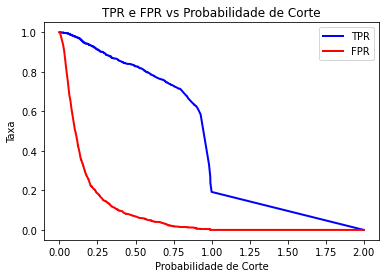

In [55]:
fig, ax = plt.subplots(1,1)
plt.title('TPR e FPR vs Probabilidade de Corte')
plt.ylabel('Taxa')
plt.xlabel('Probabilidade de Corte')
plt.plot(threshold, tpr, color='blue', linewidth=2, label = 'TPR')
plt.plot(threshold, fpr, color='red', linewidth=2, label = 'FPR')
plt.legend()

In [56]:
#Classificando como Nota maior que 550 as observações com probabilidade maior que 25% de ser desta categoria
y_score = np.where(y_score > 0.25, 1, 0)

In [57]:
#Calculando verdadeiros e falsos positivos e negativos com base no corte/classificaçao anterior
from sklearn.metrics import confusion_matrix
tn, fp, fn, tp = confusion_matrix(y_test,y_score).ravel()
(tn, fp, fn, tp)

(726, 164, 68, 712)